# K-Nearest Neighbors

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('data/regresion.txt', header=None, names=['x', 'y', 'z'] ,sep=' ')

In [4]:
df.head()

,x,y,z
0,48823.477419,-5.298,0.249
1,48823.487014,-5.907,0.132
2,48823.496759,-5.387,0.236
3,48824.458206,-5.185,0.111
4,48824.467697,-5.184,0.093


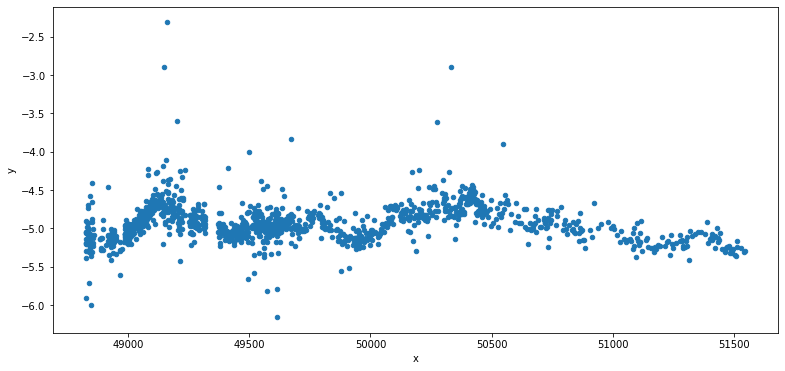

In [5]:
df.plot(kind="scatter", x='x', y='y', figsize=[13, 6])
plt.show()

In [69]:
def KNN(x, K, samples):
    
    samples = sorted(list(samples))
    distances_sq = (x - np.array(samples))**2
    nearest_idx = np.argmin(distances_sq)
    
    nearests = []
    
    low = nearest_idx - 1
    high = nearest_idx
    for i in range(K):
        if abs(x - samples[low]) < abs(x - samples[high]) or high == len(samples) - 1:
            nearests.append(samples[low])
            low -= 1
        else:
            nearests.append(samples[high])
            high += 1
    
    return nearests

In [70]:
def f(samples):
    
    samples = list(samples)
    targets = []
    
    for x in samples:
        targets.append(float(df[df['x'] == x]["y"]))

    return np.array(targets)


def KNN_prediction(x, K, samples):
    
    neighbors = np.array(KNN(x, K, samples))
    targets = f(neighbors)
    
    return targets.mean()

In [71]:
KNN(50000, 4, df["x"])

[49998.499271, 49997.475694, 50003.433958, 49996.418924]

In [72]:
KNN_prediction(50000, 4, df["x"])

-5.10825

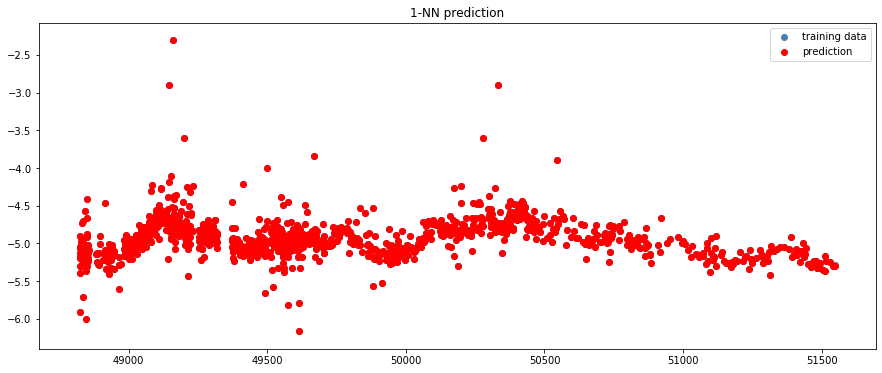

In [92]:
plt.figure(figsize=(15, 6))

plt.scatter(df["x"], df["y"], color="steelblue", label="training data")
plt.scatter(df["x"], [KNN_prediction(x, 1, df["x"]) for x in df["x"]], color="red", label="prediction")

plt.title("1-NN prediction")
plt.legend()
plt.show()

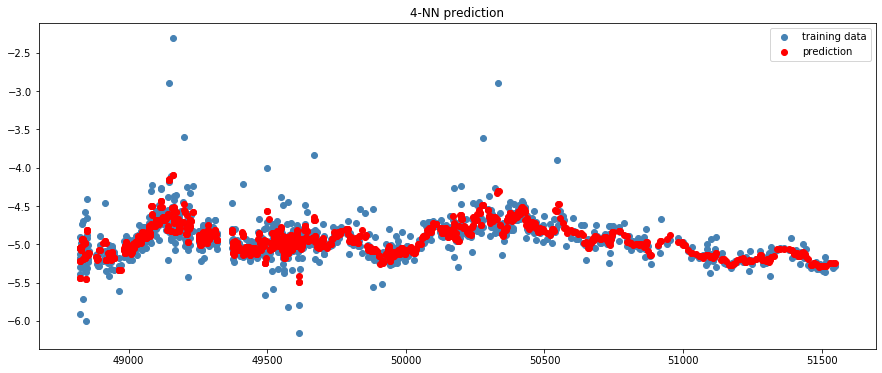

In [79]:
plt.figure(figsize=(15, 6))

plt.scatter(df["x"], df["y"], color="steelblue", label="training data")
plt.scatter(df["x"], [KNN_prediction(x, 4, df["x"]) for x in df["x"]], color="red", label="prediction")

plt.title("4-NN prediction")
plt.legend()
plt.show()

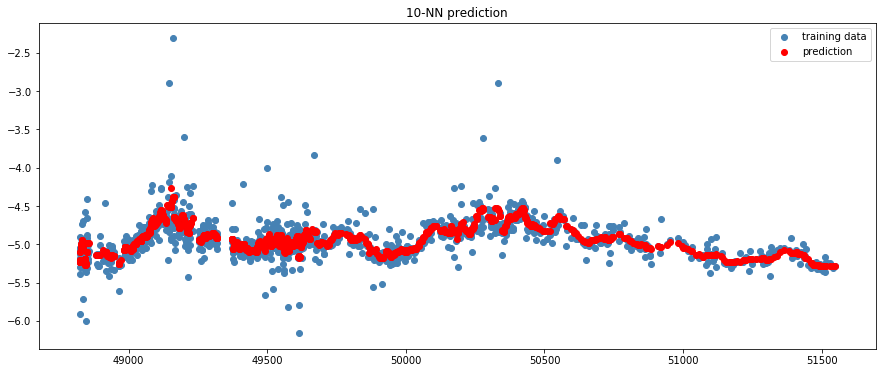

In [80]:
plt.figure(figsize=(15, 6))

plt.scatter(df["x"], df["y"], color="steelblue", label="training data")
plt.scatter(df["x"], [KNN_prediction(x, 10, df["x"]) for x in df["x"]], color="red", label="prediction")

plt.title("10-NN prediction")
plt.legend()
plt.show()

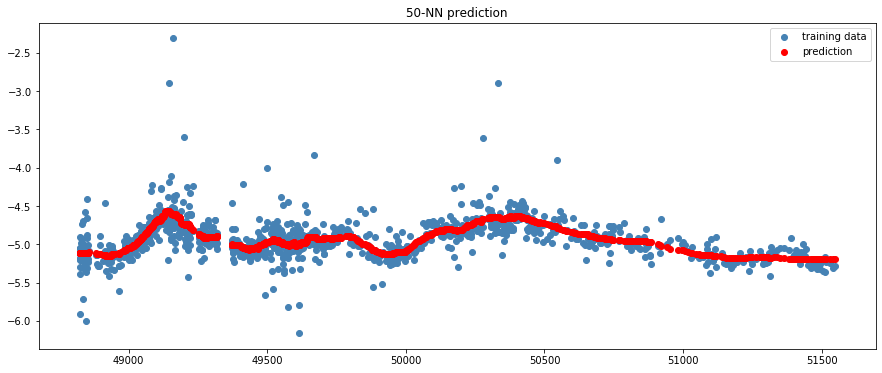

In [81]:
plt.figure(figsize=(15, 6))

plt.scatter(df["x"], df["y"], color="steelblue", label="training data")
plt.scatter(df["x"], [KNN_prediction(x, 50, df["x"]) for x in df["x"]], color="red", label="prediction")

plt.title("50-NN prediction")
plt.legend()
plt.show()

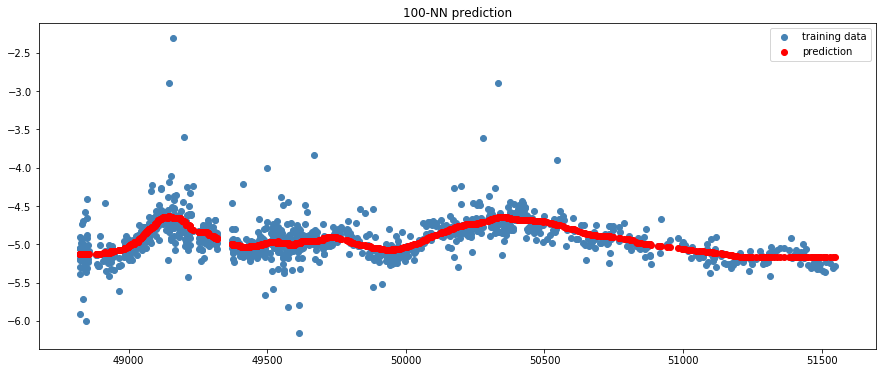

In [82]:
plt.figure(figsize=(15, 6))

plt.scatter(df["x"], df["y"], color="steelblue", label="training data")
plt.scatter(df["x"], [KNN_prediction(x, 100, df["x"]) for x in df["x"]], color="red", label="prediction")

plt.title("100-NN prediction")
plt.legend()
plt.show()

Lets split the data into testing and training sets, so we can evaluate the MSE, bias, and variance of the model.

In [ ]:
def split()